## Uploading the email urgency level dataset with already done text preprocessing




In [ ]:
import pandas as pd

data = pd.read_excel("cleaned_email_dataset.xlsx")

In [ ]:
data.head()

,email_subject,email_body,Unnamed: 2,urgency level
0,account access issue invalid credential,im unable access productpurchased account keep...,NaN,medium
1,help needed action option missing,issue productpurchased please assist possible ...,NaN,medium
2,issue reported product assistance,im issue productpurchased please assist acknow...,NaN,medium
3,troubleshooting step didnt resolve problem,im issue productpurchased please assist thanks...,NaN,medium
4,concern product security data safety,im issue productpurchased please assist want a...,NaN,medium


In [ ]:
data.drop(columns=["Unnamed: 2"], inplace = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder


le_urgency = LabelEncoder()
data['urgency level'] = le_urgency.fit_transform(data['urgency level'])


print("\nUrgency Level Mapping:")
for i, label in enumerate(le_urgency.classes_):
    print(f"{label} --> {i}")


Urgency Level Mapping:
high --> 0
low --> 1
medium --> 2


In [ ]:
X = data.iloc[:,:2] # input features

y2 = data.iloc[:,2] # second output - urgency level

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# combine two features into one string per row
combined_text = data['email_subject'].fillna("") + " " + data['email_subject'].fillna("")

# single string row will be given as as input to TfidVectorizer
vectorizer = TfidfVectorizer(max_features  = 5000,
                             min_df = 7,
                             max_df = 0.2,
                             ngram_range = (1,2))

X = vectorizer.fit_transform(combined_text).toarray()


## Rule Based Prediction

In [ ]:
urgency_labels = [
    "high",
    "medium",
    "low",
]

In [ ]:
high_urgency_word = [
    "urgent",
    "asap",
    "immediately",
    "not work",
    "down",
    "fail",

]

In [ ]:
medium_urgency_words = [
    "soon",
    "please",
    "request",
    "help",
    "issue"
]

In [ ]:
# defining rule-based urgency function

def rule_based_urgency(text):
  text = text.lower()

  for word in high_urgency_word:
    if word in text:
      return "high"

  for word in medium_urgency_words:
    if word in text:
      return "medium"

  return "low"

## ML Prediction

### Splitting the dataset into training and testing

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y2, test_size = 0.2, random_state = 42) # for classifying the email categories

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y2_pred = lr.predict(X_test)
y2_pred

array([0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 0, 2, 1, 2, 1, 2, 2, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 1,
       1, 2, 1, 0, 1, 0, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 0,
       2, 2, 1, 1, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 1, 0, 2, 0,
       1, 0, 2, 1, 2, 0, 2, 2, 1, 1, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 0, 1,
       2, 1, 0, 0, 2])

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# F1-score for multiclass
print("F1-score (weighted):", f1_score(y_test, y2_pred, average='weighted'))

F1-score (weighted): 0.8389924985356083


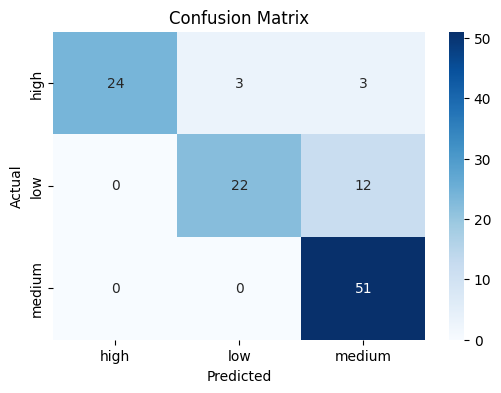

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y2_pred)
labels = ['high', 'low', 'medium'] # adjusted based on the label encoded

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [ ]:
y2_pred2 = nb.predict(X_test)
y2_pred2

array([0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 1,
       1, 2, 2, 0, 2, 0, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 1, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 1, 0, 2, 0,
       1, 0, 2, 1, 2, 0, 2, 2, 2, 1, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 0, 1,
       2, 1, 0, 0, 2])

In [ ]:
print("F1-score", f1_score(y_test,y2_pred2,average = "weighted"))

F1-score 0.7917011304108078


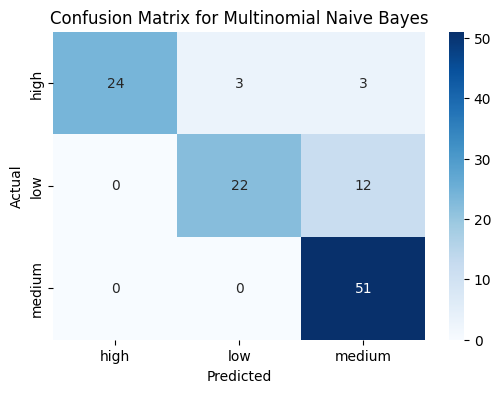

In [ ]:
cm2 = confusion_matrix(y_test,y2_pred2)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot = True, fmt = "d",cmap = "Blues",
            xticklabels = labels, yticklabels = labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Multinomial Naive Bayes")
plt.show()


### DistilBERT

In [ ]:
import torch
from transformers import DistilBertTokenizerFast,DistilBertForSequenceClassification

# converting combined texts and labels into list for BERT abd DistilBERT tokenization


email_list2 = combined_text.tolist()
urgency_list = y2.tolist()

In [ ]:
tokenizer = DistilBertTokenizerFast.from_pretrained(
    "distilbert-base-uncased"
)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [ ]:

class EmailDataset(torch.utils.data.Dataset):
  def __init__(self, encodings, labels): # stores the encodings (tokenized emails) and category labels
    self.encodings = encodings
    self.labels = labels

  def __getitem__(self,idx): # when you ask for dataset[5], it returns a dictionary like
    item = {key: torch.tensor(val[idx]) for key,val in self.encodings.items()}
    item['labels'] = torch.tensor(self.labels[idx])
    return item

  def __len__(self): # tells Pytorch how many samples are in the dataset
    return len(self.labels)



In [ ]:
train_texts, test_texts, train_labels, test_labels = train_test_split(
    email_list2, urgency_list, test_size = 0.2, random_state = 42
)

In [ ]:

model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels = 3 # 3 email urgency levels
)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
train_encodings = tokenizer(
    train_texts,
    truncation = True,
    padding = True,
    max_length = 128
)

test_encodings = tokenizer(
    test_texts,
    truncation = True,
    padding = True,
    max_length = 128
)

In [ ]:
# Make them as Pytorch Dataset

train_dataset = EmailDataset(train_encodings, train_labels)
test_dataset = EmailDataset(test_encodings, test_labels)

In [ ]:
from transformers import Trainer,TrainingArguments

training_args = TrainingArguments(
    output_dir = "./results",
    num_train_epochs = 3, # finetuning
    per_device_train_batch_size = 8, # safe for limited GPU
    logging_dir = "./logs",
    logging_steps = 10,
    save_strategy = "no" # avoids the saving checkpoints for the demo
)



In [ ]:
trainer1 = Trainer(
    model = model,
    args = training_args,
    train_dataset = train_dataset,
    eval_dataset = test_dataset,
)

trainer1.train()

/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice:

 3


wandb: You chose "Don't visualize my results"


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss
10,0.953300
20,0.607200
30,0.491200
40,0.214600
50,0.182600
60,0.085200
70,0.039000
80,0.066900
90,0.133100
100,0.018700


TrainOutput(global_step=174, training_loss=0.16429459688992337, metrics={'train_runtime': 546.4298, 'train_samples_per_second': 2.509, 'train_steps_per_second': 0.318, 'total_flos': 15607628640648.0, 'train_loss': 0.16429459688992337, 'epoch': 3.0})

In [ ]:
predictions = trainer1.predict(test_dataset)
y2_pred3 = predictions.predictions.argmax(axis=1)
y2_true = predictions.label_ids

In [ ]:
print("Accuracy:", accuracy_score(test_labels , y2_pred3))

# F1-score (multiclass → use average)
print("F1-score (weighted):", f1_score(test_labels , y2_pred3, average='weighted'))


Accuracy: 0.9565217391304348
F1-score (weighted): 0.9566357295830876


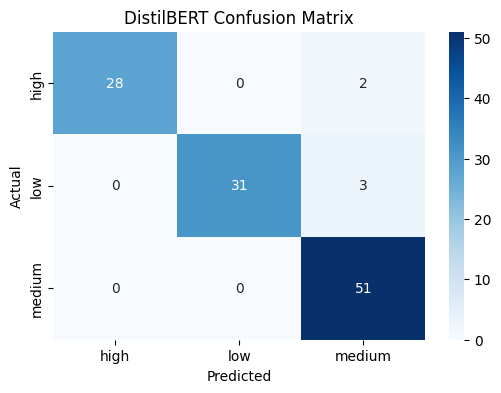

In [ ]:
cm = confusion_matrix(test_labels, y2_pred3)

labels = ['high', 'low', 'medium']
cm_df = pd.DataFrame(cm, index=labels, columns=labels)


plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('DistilBERT Confusion Matrix')
plt.show()


### BERT model

In [ ]:
from transformers import BertTokenizerFast, BertForSequenceClassification

train_texts, test_texts, train_labels, test_labels = train_test_split(
    email_list2, urgency_list, test_size = 0.2, random_state = 42
)


In [ ]:
# ---------------- Dataset Class ----------------
class EmailDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = EmailDataset(train_encodings, train_labels)
test_dataset = EmailDataset(test_encodings, test_labels)


In [ ]:
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels = 3  # high,medium,low
)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
trainer2 = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)
trainer2.train()

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss
10,0.951600
20,0.586600
30,0.471900
40,0.235700
50,0.215600
60,0.069700
70,0.063500
80,0.041300
90,0.113100
100,0.015900


TrainOutput(global_step=174, training_loss=0.15995380402296439, metrics={'train_runtime': 744.9755, 'train_samples_per_second': 1.84, 'train_steps_per_second': 0.234, 'total_flos': 31000105099656.0, 'train_loss': 0.15995380402296439, 'epoch': 3.0})

In [ ]:
predictions = trainer1.predict(test_dataset)
y2_pred4 = predictions.predictions.argmax(axis=1)
y2_true = predictions.label_ids

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


In [ ]:
print("Accuracy:", accuracy_score(test_labels , y2_pred3))

# F1-score (multiclass → use average)
print("F1-score (weighted):", f1_score(test_labels , y2_pred3, average='weighted'))


Accuracy: 0.9565217391304348
F1-score (weighted): 0.9566357295830876


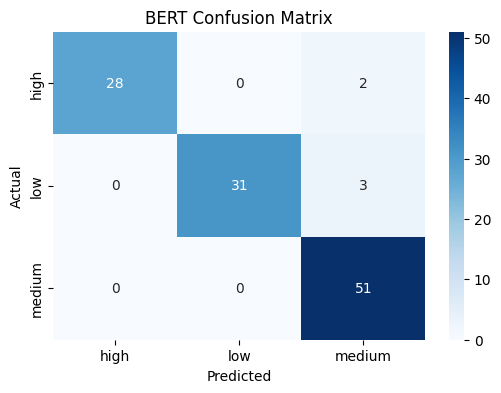

In [ ]:
cm = confusion_matrix(test_labels, y2_pred3)

labels = ['high', 'low', 'medium']
cm_df = pd.DataFrame(cm, index=labels, columns=labels)


plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('BERT Confusion Matrix')
plt.show()


### Saving the Best Model

DistilBERT and BERT models have high F1 score and accuracy. So we take DistilBERT as the best model and save it

In [ ]:
# Save the trained model
trainer1.model.save_pretrained("saved_model_urgency")
